# Coincidence Trigger

## Import Libraries

In [1]:
import os, sys
import obspy as obs
import matplotlib.pyplot as plt

from obspy.clients.fdsn import Client
from obspy.signal.trigger import coincidence_trigger

# import subprocess
# import optparse
# from copy import deepcopy

# import numpy as np

# from obspy import UTCDateTime, Stream, read_inventory
# from obspy.core import AttribDict
# from obspy.signal import coincidenceTrigger

# from obspy.seishub import Client as SeishubClient
# from obspy.seedlink import Client as SeedlinkClient

# from seishub_event_templates import returnTemplates

## Configurations

In [12]:
config = {}

## before 2023-04-01
config['seeds'] = {"rotation":"PY.BSPF..HJ*", "translation":"II.PFO.10.BH*"}
## after 2023-04-01
# config['seeds'] = ["PY.BSPF..HJ*", "PY.PFOIX..HH*"]


config['tbeg'] = obs.UTCDateTime("2022-10-03 16:00:00")
config['tend'] = obs.UTCDateTime("2022-10-03 17:00:00")

config['tbeg'] = obs.UTCDateTime("2022-10-28 12:00:00")
config['tend'] = obs.UTCDateTime("2022-10-28 16:00:00")

config['output_path'] = "/home/andbro/kilauea-data/BSPF/trigger/"


config['client'] = Client("IRIS")

## Load Data

In [13]:
# def __request_data(seed, client, tbeg, tend):

#     print(seed)
#     net, sta, loc, cha = seed.split(".")

#     try:
#         inventory = client.get_stations(network=net, 
#                                          station=sta,
#                                          starttime=tbeg,
#                                          endtime=tend,
#                                          level="response",
#                                          )
#     except:
#         print(f" -> Failed to load inventory for {seed}!")
#         return

#     try:
#         waveform = client.get_waveforms(network=net,
#                                        station=sta,
#                                        location=loc,
#                                        channel=cha, 
#                                        starttime=tbeg-60,
#                                        endtime=tend+60,
#                                        )

#     except:
#         print(f" -> Failed to load waveforms for {seed}!")
#         return
    
#     return waveform, inventory

In [14]:
from functions.request_data import __request_data

In [15]:
st_xpfo, inv_xpfo = __request_data(config['seeds']['translation'], config['tbeg'], config['tend'])

 -> response removed!


In [16]:
st_bspf, inv_bspf = __request_data(config['seeds']['rotation'], config['tbeg'], config['tend'])

 -> sensitivity removed!


## Process Data

In [17]:
st_xpfo_proc = st_xpfo.copy()
# st_xpfo_proc = st_xpfo_proc.remove_response(inventory=inv_xpfo, output="ACC")

st_bspf_proc = st_bspf.copy()
# st_bspf_proc = st_bspf_proc.remove_sensitivity(inventory=inv_bspf)
st_bspf_proc = st_bspf_proc.resample(40.0)


st_xpfo_proc = st_xpfo_proc.normalize(global_max=False)
st_bspf_proc = st_bspf_proc.normalize(global_max=False)

In [18]:
st = obs.Stream()

st += st_bspf_proc.copy()
st += st_xpfo_proc.copy()

st.detrend("linear")
st.taper(0.01)
st.filter('bandpass', freqmin=1.0, freqmax=20.0, corners=4, zerophase=True)  # optional prefiltering

6 Trace(s) in Stream:
PY.BSPF..HJE  | 2022-10-28T11:59:00.001300Z - 2022-10-28T16:00:59.976300Z | 40.0 Hz, 580800 samples
PY.BSPF..HJN  | 2022-10-28T11:59:00.001300Z - 2022-10-28T16:00:59.976300Z | 40.0 Hz, 580800 samples
PY.BSPF..HJZ  | 2022-10-28T11:59:00.001300Z - 2022-10-28T16:00:59.976300Z | 40.0 Hz, 580800 samples
II.PFO.10.BHN | 2022-10-28T11:59:00.019538Z - 2022-10-28T16:00:59.994538Z | 40.0 Hz, 580800 samples
II.PFO.10.BHE | 2022-10-28T11:59:00.019538Z - 2022-10-28T16:00:59.994538Z | 40.0 Hz, 580800 samples
II.PFO.10.BHZ | 2022-10-28T11:59:00.019538Z - 2022-10-28T16:00:59.994538Z | 40.0 Hz, 580800 samples

6 Trace(s) in Stream:
PY.BSPF..HJE  | 2022-10-28T11:59:00.001300Z - 2022-10-28T16:00:59.976300Z | 40.0 Hz, 580800 samples
PY.BSPF..HJN  | 2022-10-28T11:59:00.001300Z - 2022-10-28T16:00:59.976300Z | 40.0 Hz, 580800 samples
PY.BSPF..HJZ  | 2022-10-28T11:59:00.001300Z - 2022-10-28T16:00:59.976300Z | 40.0 Hz, 580800 samples
II.PFO.10.BHN | 2022-10-28T11:59:00.019538Z - 2022-10-28T16:00:59.994538Z | 40.0 Hz, 580800 samples
II.PFO.10.BHE | 2022-10-28T11:59:00.019538Z - 2022-10-28T16:00:59.994538Z | 40.0 Hz, 580800 samples
II.PFO.10.BHZ | 2022-10-28T11:59:00.019538Z - 2022-10-28T16:00:59.994538Z | 40.0 Hz, 580800 samples

/home/brotzer/anaconda3/lib/python3.7/site-packages/obspy/signal/filter.py:67: UserWarning: Selected high corner frequency (20.0) of bandpass is at or above Nyquist (20.0). Applying a high-pass instead.
  warnings.warn(msg)


6 Trace(s) in Stream:
PY.BSPF..HJE  | 2022-10-28T11:59:00.001300Z - 2022-10-28T16:00:59.976300Z | 40.0 Hz, 580800 samples
PY.BSPF..HJN  | 2022-10-28T11:59:00.001300Z - 2022-10-28T16:00:59.976300Z | 40.0 Hz, 580800 samples
PY.BSPF..HJZ  | 2022-10-28T11:59:00.001300Z - 2022-10-28T16:00:59.976300Z | 40.0 Hz, 580800 samples
II.PFO.10.BHN | 2022-10-28T11:59:00.019538Z - 2022-10-28T16:00:59.994538Z | 40.0 Hz, 580800 samples
II.PFO.10.BHE | 2022-10-28T11:59:00.019538Z - 2022-10-28T16:00:59.994538Z | 40.0 Hz, 580800 samples
II.PFO.10.BHZ | 2022-10-28T11:59:00.019538Z - 2022-10-28T16:00:59.994538Z | 40.0 Hz, 580800 samples

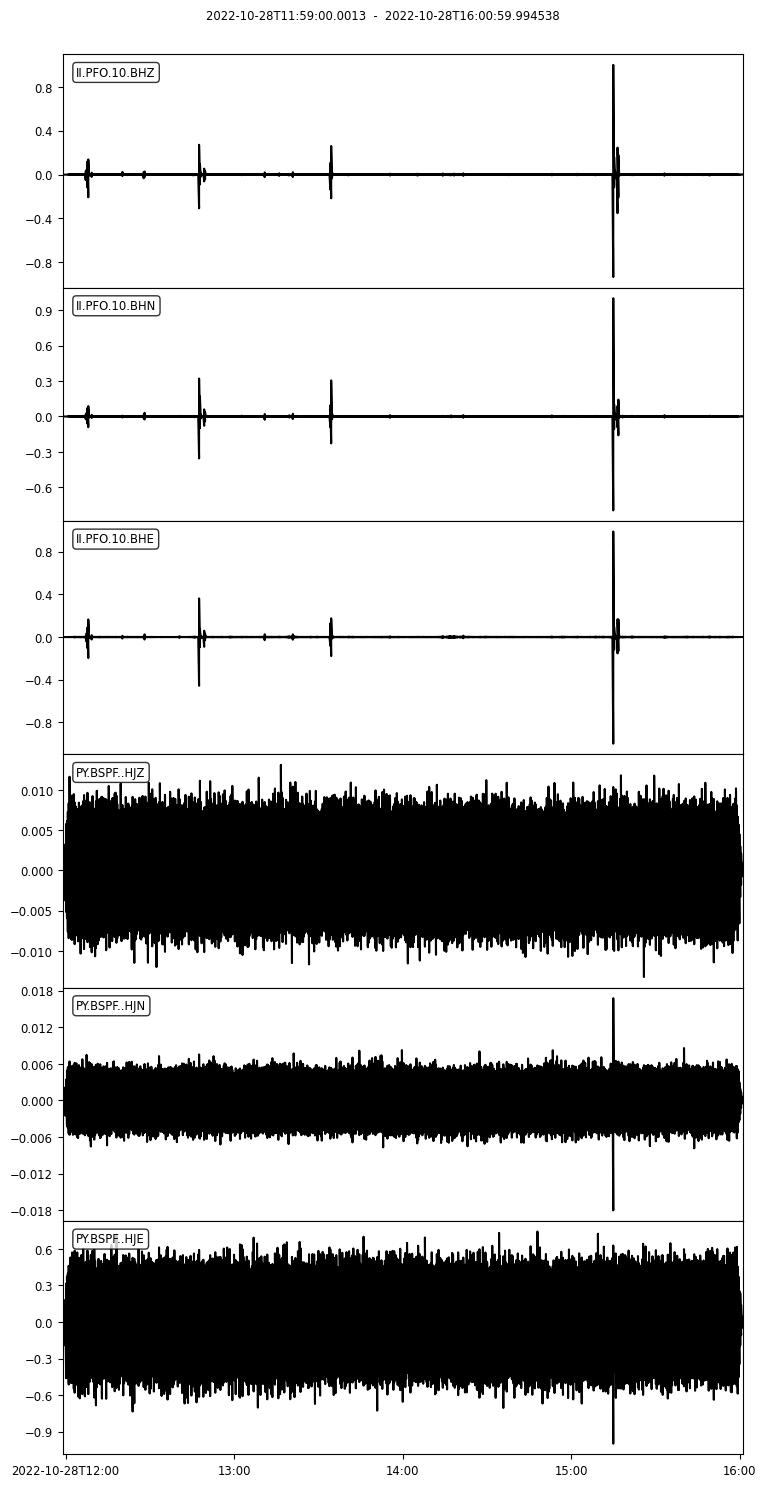

In [19]:
st.plot(equal_scale=False);

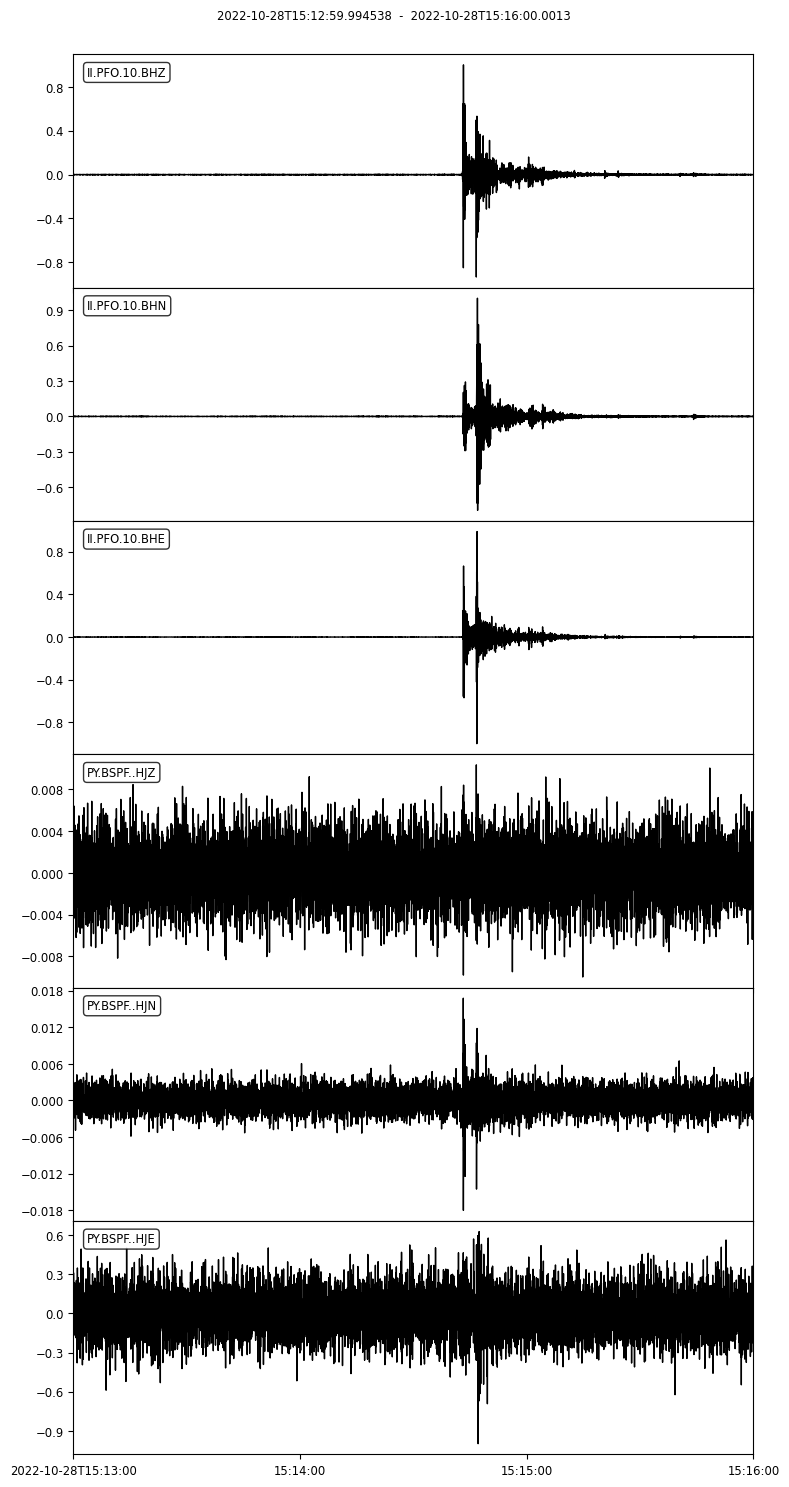

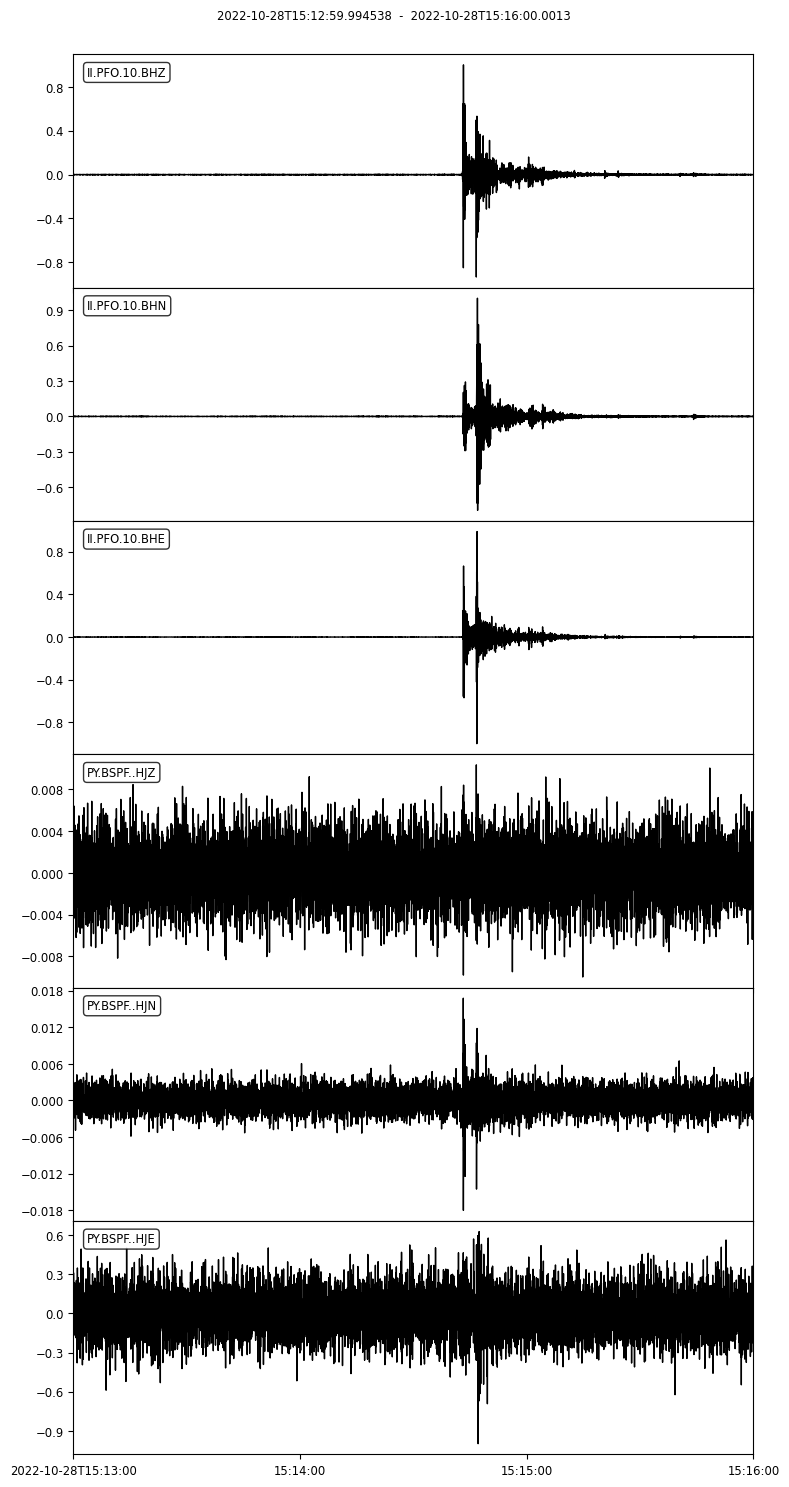

In [26]:
st.trim(obs.UTCDateTime("2022-10-28 15:13"), obs.UTCDateTime("2022-10-28 15:16")).plot(equal_scale=False)

## Launch Trigger

6 Trace(s) in Stream:
PY.BSPF..HJE  | 2022-10-28T15:13:00.001300Z - 2022-10-28T15:16:00.001300Z | 40.0 Hz, 7201 samples
PY.BSPF..HJN  | 2022-10-28T15:13:00.001300Z - 2022-10-28T15:16:00.001300Z | 40.0 Hz, 7201 samples
PY.BSPF..HJZ  | 2022-10-28T15:13:00.001300Z - 2022-10-28T15:16:00.001300Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN | 2022-10-28T15:12:59.994538Z - 2022-10-28T15:15:59.994538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHE | 2022-10-28T15:12:59.994538Z - 2022-10-28T15:15:59.994538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ | 2022-10-28T15:12:59.994538Z - 2022-10-28T15:15:59.994538Z | 40.0 Hz, 7201 samples

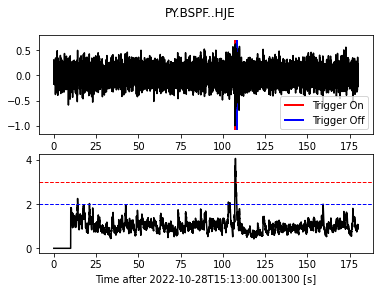

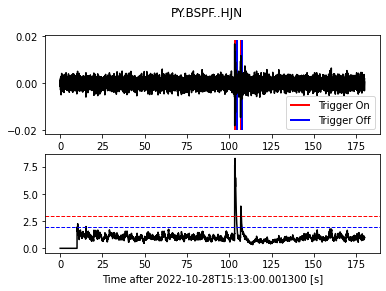

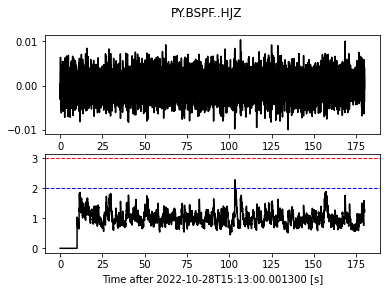

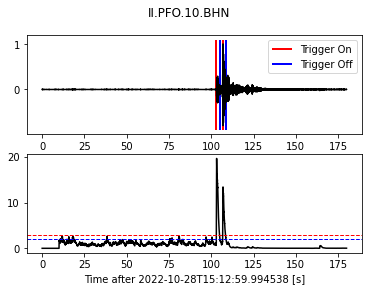

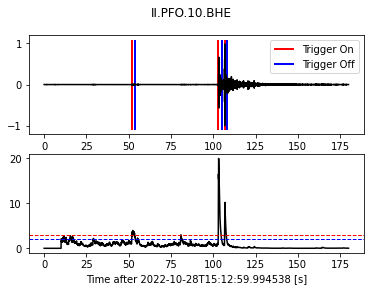

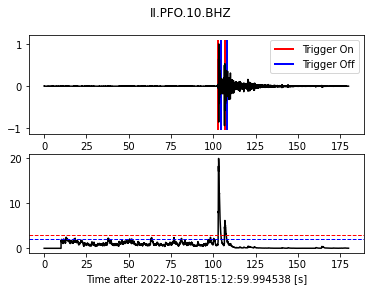

[{'coincidence_sum': 6.0,
  'duration': 179.98176193237305,
  'similarity': {},
  'stations': ['PFO', 'PFO', 'PFO', 'BSPF', 'BSPF', 'BSPF'],
  'time': UTCDateTime(2022, 10, 28, 15, 13, 0, 19538),
  'trace_ids': ['II.PFO.10.BHE',
                'II.PFO.10.BHZ',
                'II.PFO.10.BHN',
                'PY.BSPF..HJE',
                'PY.BSPF..HJN',
                'PY.BSPF..HJZ']}]


In [27]:
from obspy.signal.trigger import recursive_sta_lta, trigger_onset, plot_trigger
from obspy.signal.trigger import coincidence_trigger
from pprint import pprint

st2 = st.copy()

st2.normalize(global_max=True)

df = st[0].stats.sampling_rate

config['trigger_type'] = 'recstalta'
config['thr_on'] = 3.0  ## thr_on (float) – threshold for switching single station trigger on
config['thr_off'] = 2.0 ## thr_off (float) – threshold for switching single station trigger off
config['lta'] = int(10*df)
config['sta'] = int(0.5*df)
config['thr_coincidence_sum'] = 5
# config['similarity_thresholds'] = {"BSPF": 0.5, "PFO": 0.5}

       
for ii in range(len(st)):
    tr = st[ii]

    cft = recursive_sta_lta(tr.data, config['sta'], config['lta'])

    on_off = trigger_onset(cft, config['thr_on'], config['thr_off'])

    plot_trigger(tr, cft, config['thr_on'], config['thr_off'])



trig = coincidence_trigger(config['trigger_type'],
                           config['thr_on'],
                           config['thr_off'],
                           stream = st2, 
                           thr_coincidence_sum = config['thr_coincidence_sum'], 
                           sta=config['sta'], 
                           lta=config['lta'],
#                            similarity_threshold=config['similarity_thresholds'],
                          )

pprint(trig)

In [28]:
# times = st[0].times("utcdatetime")

# plt.plot(st[0].times(), st[0].data)

# for jj, trg in enumerate(trig):
#     t1, t2 = trg['time']-st[0].times("utcdatetime")[0], (trg['time']-st[0].times("utcdatetime")[0])+trg['duration']
#     plt.fill_between([t1, t2], min(st[0].data), max(st[0].data), color="red", alpha=0.5, zorder=0)

# plt.show();